In [1]:
import database as db
import datetime as dt
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
db.set_up_connection(db.db, 'db_weather', user='webscrapers')

postgres user password: ········


In [ ]:
query = db.DailyMeasurement.select(lambda m : 'Berlin' in m.station.stationsname and dt.date(2016,4,26) < m.mess_datum and m.mess_datum < dt.date(2017,4,30)).get_sql()
pd_query = pd.read_sql(query, db.conn_url)
means_db = pd_query.groupby('mess_datum').mean()

In [5]:
def get_plot(time_start, time_end, label, city):
    ''''
        Parameters:
            time_start = a string giving the beginning of the interval to plot, can be a year (YYYY), 
                         year and month (YYYYMM) or year, month and day (YYYYMMDD) or with hour (YYYYMMDDHH)
            time_end = a string giving the end of the interval to plot, need to be always the same format as time_start
            label = The feature you want to plot e.g temperature can be list
            city = for which city you want to plot the feature, can be list
        Returns:
            name = title of the plot
            dataframe = pandas dataframe with rows beeing time with timestemps as labels 
                        and row cerresoning to the freatures asked for with corresponding units
    ''''
    hourly = False
    if len(time_start) == 4:
        t_ival = [dt.date(int(time_start),1,1), dt.date(int(time_end),12,31)]
    elif len(time_start) == 6:
        t_ival = [dt.date(time_start[:4],time_start[4:],1), dt.date(time_end[:4],time_end[4:],31)]
    elif len(time_start) == 8:
        t_ival = [dt.date(time_start[:4],time_start[4:-2],time_start[-2:]), dt.date(time_end[:4],time_end[4:-2],time_end[-2:])]
    elif len(time_start) == 10:
        # see what is the right format for accessing the hourly data
        t_ival = [] #[dt.date(time_start[:4],time_start[4:-2],time_start[-2:]), dt.date(time_end[:4],time_end[4:-2],time_end[-2:])]
        hourly = True
    elif:
        raise IOError('No valid time format!')
    if hourly == True:
        # access different data base
        pass
    else:
        #db.set_up_connection(db.db, 'db_weather', user='webscrapers')
    
    query = db.DailyMeasurement.select(lambda m : 'Berlin' in m.station.stationsname and t_ival[0] <= m.mess_datum and m.mess_datum <= t_ival[1]).get_sql()
    pd_query = pd.read_sql(query, db.conn_url)
    means_db = pd_query.groupby('mess_datum').mean()

01
(368,)


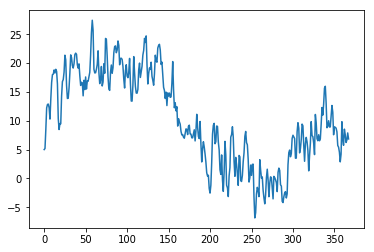

In [12]:
time_start = '20000301'
print(time_start[-2:])
temperature = means_db['tmk']
print(temperature.shape)
plt.plot(range(temperature.shape[0]), temperature)
plt.show()